# *Pós-graduação em Ciência e Dados e Machine Learning*
### *Trabalho Final - Machine Learning*

**Disciplina:** Fundamentos de Machine Learning

**Professor:** André Juan Costa Vieira

**Turma:** A

**Nomes dos Integrantes:**

1 - Matheus Nascimento

2 - Pedro Henrique Lima Cardoso

3 - Lucas Bitar

## Qualidade de vinhos.

Você foi contratado como cientista de dados pela famosa vinícola **"Vini Tradizionali di Manduria"** para analisar todos os aspectos dos vinhos produzidos. Diversas questões foram levantadas, como: Compreender os padrões das características que proporcionam boas safras e a qualidade de novos vinhos produzidos, antes que a comunidade mundial **"Vins Spectaculaires"** os deguste, apontar quais são os novos **"blends"** que podem ter continuidade no desenvolvimento, dentre várias outras atividades que visam as boas tomadas de decisões, sempre com o intuito de servir os melhores rótulos, aumentando os lucros e diminuindo os gastos.        

A equipe de enólogos faz estudos frequentes para verificar as características de cada vinho, colocando-os em planilhas. Para melhor compreensão dos dados, descreveram o que significado de cada propriedade.   


##### Descrição

**0. Color:** Se o vinho é tinto vermelho ou branco

**1. Fixed Acidity:** Qtd.de Ácido não volátil, aquele que não evapora fácil

**2. Volatile Acidity:** Teor de ácido acético que leva a um sabor desagradável de vinagre

**3. Citric Acid:** Um tipo de ácido que age como conservante para aumentar o nível de acidez em pequena quantidade para adicionar aroma e sabor

**4. Residual Sugar:** Qtd. de açúcar restante depois da fermentação, mais de 45g/litro é doce

**5. Chlorides:** Qtd. de sal

**6. Free Sulfur Dioxide:** Componente que impede crescimento microbiano e a oxidação do vinho

**7. Total Sulfur Dioxide:** Qtd. de SO2 (dióxido de enxofre)

**8. Density:** Densidade do vinho,

**9. pH:** Nível de acidez ou potencial hidrogeniônico

**10. Sulphates:** Um adicional que contribui para níveis de SO2 e é
antimicróbico e antioxidante

**11. Alcohol:** Qtd. de álcool

**12. Qualidade:** Notas de 3 a 9

# Questões

### Importe todas as bibliotecas necessárias na célula abaixo
##### Organize-as de forma crescente em relação ao tamanho da frase

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_recall_fscore_support,
    mean_squared_error,
    r2_score
)
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import SMOTE
from datetime import time
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
import random
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


### Tratamento dos Dados


Sir. Pounce, enólogo de longa data, especializado em vinhos italianos, descobriu que estão faltando alguns valores nas planilhas, e que outros dados foram alterados pelo ex-funcionário Smeagle, dispensado por degustar vinhos 'preciosos'.   

**Utilize o dataset 'wines_preprocessing.csv' para fazer as questões abaixo.**

1- Busque os valores faltantes no dataset e trate-os.

2- Busque valores incongruentes no dataset, imprima e os trate.

3- Valide seus tratamentos com o dataset **'wines.csv'**, demonstrando se foi possível manter as distribuições de forma adequada.

In [ ]:
file_path_preprocessing = 'wines_pre_processing.csv'
wines_pre_processing = pd.read_csv(file_path_preprocessing)

missing_values = wines_pre_processing.isnull().sum()
missing_values[missing_values > 0]

file_path_wines = 'wines.csv'

wines = pd.read_csv(file_path_wines)
wines

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99000,3.28,0.51,13.4,6
1,red,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,0.75,9.8,5
2,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
3,white,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.99620,3.42,0.40,9.3,7
4,white,7.1,0.20,0.34,16.0,0.050,51.0,166.0,0.99850,3.21,0.60,9.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.6,0.24,0.30,13.0,0.052,18.0,143.0,0.99825,3.37,0.49,9.4,6
6493,white,7.2,0.17,0.37,6.9,0.059,47.0,128.0,0.99322,3.08,0.46,11.0,7
6494,white,5.8,0.30,0.38,4.9,0.039,22.0,86.0,0.98963,3.23,0.58,13.1,7
6495,white,6.6,0.28,0.30,7.8,0.049,57.0,202.0,0.99580,3.24,0.39,9.5,5


In [ ]:
for col in wines_pre_processing.columns:
    if wines_pre_processing[col].dtype != 'object':
        wines_pre_processing[col].fillna(wines_pre_processing[col].median(), inplace=True)
    else:
        wines_pre_processing[col].fillna(wines_pre_processing[col].mode()[0], inplace=True)


In [ ]:
numeric_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                   'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                   'density', 'pH', 'sulphates', 'alcohol', 'quality']

wines_pre_processing[numeric_columns] = wines_pre_processing[numeric_columns].apply(pd.to_numeric, errors='coerce')


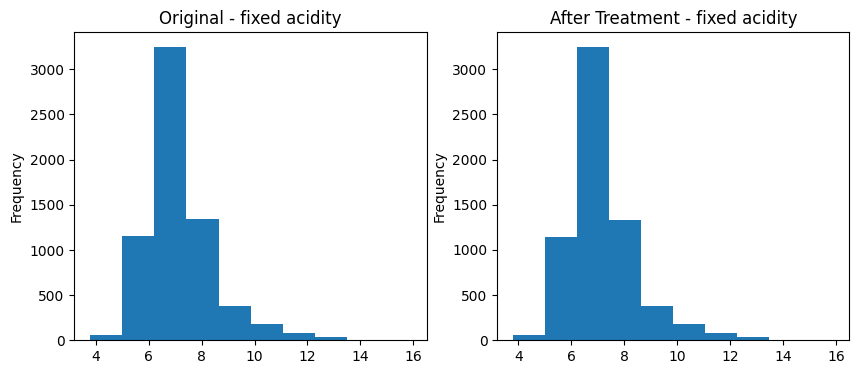

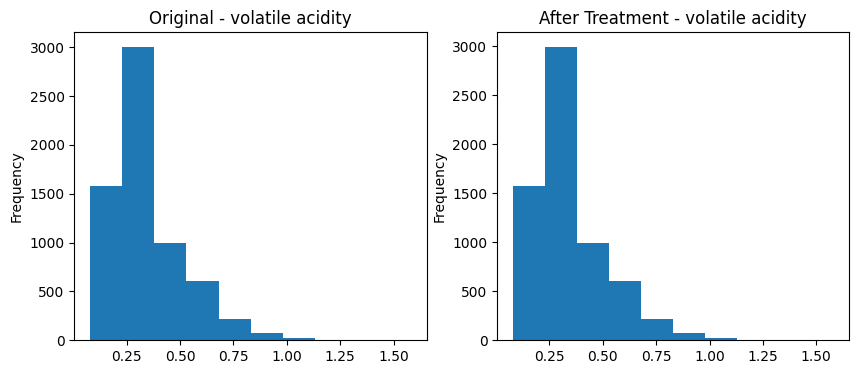

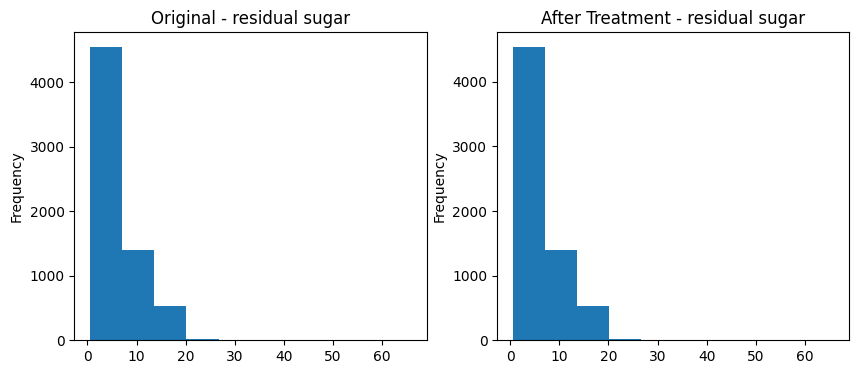

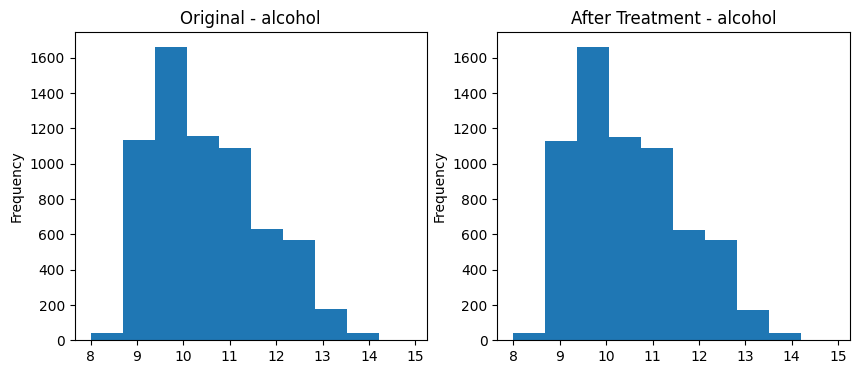

In [ ]:
def compare_distributions(col):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    wines[col].plot(kind='hist', title=f'Original - {col}')
    plt.subplot(1, 2, 2)
    wines_pre_processing[col].plot(kind='hist', title=f'After Treatment - {col}')
    plt.show()

columns_to_compare = ['fixed acidity', 'volatile acidity', 'residual sugar', 'alcohol']
for col in columns_to_compare:
    compare_distributions(col)

O dono da vinícola, Sir. Donald Shelby, tem um filho cursando especialização em ciência de dados, que, ao deparar-se com o dataset, pediu a você que, ao invés de ficar tratando dados com 'essas' técnicas triviais, fizesse um algoritmo de regressão logística para encontrar os valores faltantes na coluna 'Alcohol'. O Sr. Shelby é um homem conhecido como mafioso e considera seu filho um gênio, por isso, você, com fortes receios de sofrer consequências inusitadas por ordem do Don Corleone da atualidade, acatou o "pedido".


4- Desenvolver um algoritmo de regressão logística visando preencher os dados faltantes da coluna "Alcohol". Em seguida, valide os resultados com o dataset **"wines.csv"**, apresentando todas as métricas de classificação estudadas.

In [ ]:
wines_pre_processing['Alcohol_Missing'] = wines_pre_processing['alcohol'].isnull().astype(int)

numeric_cols = wines_pre_processing.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = wines_pre_processing.select_dtypes(include=['object']).columns

imputer = SimpleImputer(strategy='median')
numeric_data_imputed = pd.DataFrame(imputer.fit_transform(wines_pre_processing[numeric_cols]), columns=numeric_cols)
categorical_data_encoded = pd.get_dummies(wines_pre_processing[categorical_cols])

X_imputed = pd.concat([numeric_data_imputed, categorical_data_encoded], axis=1).drop(['alcohol', 'Alcohol_Missing'], axis=1)
y = wines_pre_processing['Alcohol_Missing']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
classification_metrics = classification_report(y_test, y_pred)

classification_metrics

'              precision    recall  f1-score   support\n\n           0       0.71      0.85      0.78      1977\n           1       0.81      0.64      0.72      1915\n\n    accuracy                           0.75      3892\n   macro avg       0.76      0.75      0.75      3892\nweighted avg       0.76      0.75      0.75      3892\n'

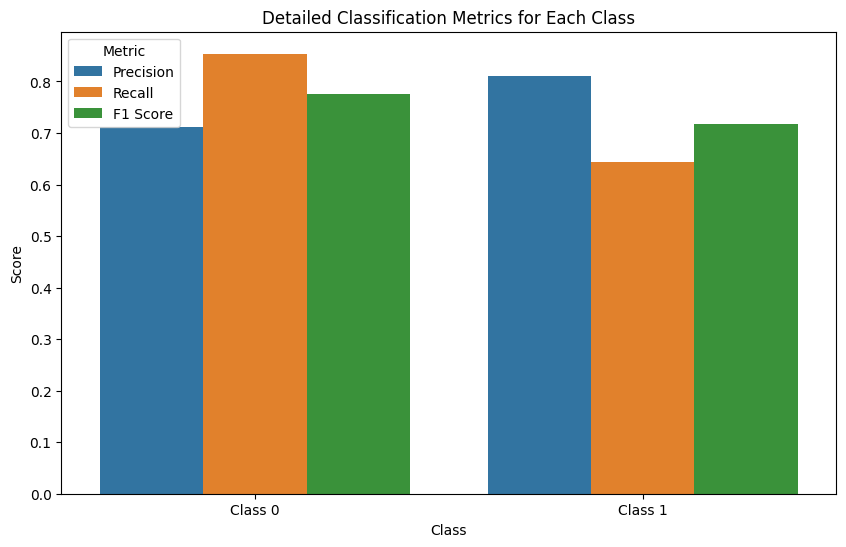

MSE: 0.249743062692703
RMSE: 0.49974299664197697
R2: 0.0007741771891107696
MAE: 0.249743062692703


In [ ]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

metrics_df = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score},
    index=['Class 0', 'Class 1']
)

metrics_melted = metrics_df.reset_index().melt(id_vars='index')

plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='value', hue='variable', data=metrics_melted)
plt.title('Detailed Classification Metrics for Each Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.show()

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)
print("MAE:", mae)

5- Você, ao ver os resultados encontrados, se adiantou e fez um modelo de regressão polinomial para dirimir a questão. Em seguida, validou os resultados com o dataset **"wines.csv"**, utilizando todas as métricas de regressão estudadas. Por fim, escreverá um e-mail explicando o motivo <u>técnico</u> que o levou a não utilizar a regressão logística neste problema, bem como qual a melhor técnica que encontrou para tratar os valores faltantes.

In [ ]:
file_path = 'wines.csv'
wines = pd.read_csv(file_path)

# Preparar as variáveis independentes (X) e a variável dependente (y)
X = wines.drop('alcohol', axis=1)
y = wines['alcohol']

# Converter colunas categóricas em numéricas (one-hot encoding)
X = pd.get_dummies(X)


In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalonar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar a transformação polinomial
poly = PolynomialFeatures(degree=2)  # Você pode ajustar o grau conforme necessário
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Construir e ajustar o modelo de regressão polinomial
model = LinearRegression()
model.fit(X_train_poly, y_train)


LinearRegression()

In [ ]:
# Previsões e avaliação do modelo
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)


MSE: 0.21361712656353074
RMSE: 0.46218732843245575
R2: 0.844187712392857


Resposta "email": No nosso projeto de análise de dados de vinhos, optamos pela regressão polinomial ao invés da regressão logística, uma escolha influenciada pela natureza contínua da variável 'alcohol' e pela complexidade das relações entre as características dos vinhos. A regressão logística, embora eficaz para classificação binária, não é ideal para prever variáveis contínuas. Em contrapartida, a regressão polinomial se destaca ao modelar relações não lineares entre variáveis contínuas, permitindo um mapeamento mais preciso das nuances dos nossos dados.
Além disso, para lidar com os valores faltantes em nosso dataset, utilizamos técnicas de imputação baseadas no tipo de dados de cada coluna. Para as colunas numéricas, optamos pela mediana, que é menos suscetível a outliers e fornece um valor representativo central em casos de distribuição assimétrica. Já para as colunas categóricas, usamos a moda, ou seja, o valor mais frequente, para manter a integridade das categorias originais. Essa abordagem cuidadosa na preparação dos dados assegura a qualidade e a confiabilidade de nossa análise regressiva polinomial.

### Análise Exploratória
**Utilize o dataset 'wines.csv'**

A enóloga Marilyn Monroe, direta do Sir. Pounce, tomou conhecimento de suas habilidades exploratórias e requereu gráficos "chiques, reuscados, enfeitados e nada triviais" que mostrassem, de forma interativa todos os dados e seus respectivos insights. A principal exigência é de que as paletas de cores sejam harmônicas, de modo que possam ser utilizadas em apresentações. Para isso, sugeriu a documentação a seguir:
[Colors Palettes](https://plotly.com/python/builtin-colorscales/)

1- Utilize um countplot para averiguar a quantidade de vinhos por cada avaliação de qualidade.
Separare entre vinhos tintos e brancos, fazendo um gráfico para cada tipo.

2- Utilize um jointplot para descrever a relação entre álcool e açucar. Utilizar o tipo 'KDE'.

3- Utilize um boxplot para verificar se existe algum vinho que seja considerado um outlier. Utilize **x = 'quality'** e **y='residual sugar'**. Identificando os outliers, crie um novo dataframe, utilize um barplot para contabilizar a quantidade de vinhos tintos
e brancos por qualidade de modo que as barras estejam sobrepostas em relação ao tipo de vinho.   

4- Faça um gráfico de correlação e encontre quais são as 'features' que contém correlações
positivas e negativas fortes  entre si. Em seguida, utilize o scatterplot, colocando no eixo "x" e "y"
cada variável correlata e descreva por escrito o motivo da distribuição e o sentido vetorial estarem apresentados
das respectivas formas.

**ps**: Para este problema, entenda como correlações fortes valores menores que -0.4 e maiores que 0.4.

In [ ]:
file_path_wines = 'wines.csv'
wines = pd.read_csv(file_path_wines)
wines

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99000,3.28,0.51,13.4,6
1,red,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,0.75,9.8,5
2,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
3,white,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.99620,3.42,0.40,9.3,7
4,white,7.1,0.20,0.34,16.0,0.050,51.0,166.0,0.99850,3.21,0.60,9.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.6,0.24,0.30,13.0,0.052,18.0,143.0,0.99825,3.37,0.49,9.4,6
6493,white,7.2,0.17,0.37,6.9,0.059,47.0,128.0,0.99322,3.08,0.46,11.0,7
6494,white,5.8,0.30,0.38,4.9,0.039,22.0,86.0,0.98963,3.23,0.58,13.1,7
6495,white,6.6,0.28,0.30,7.8,0.049,57.0,202.0,0.99580,3.24,0.39,9.5,5


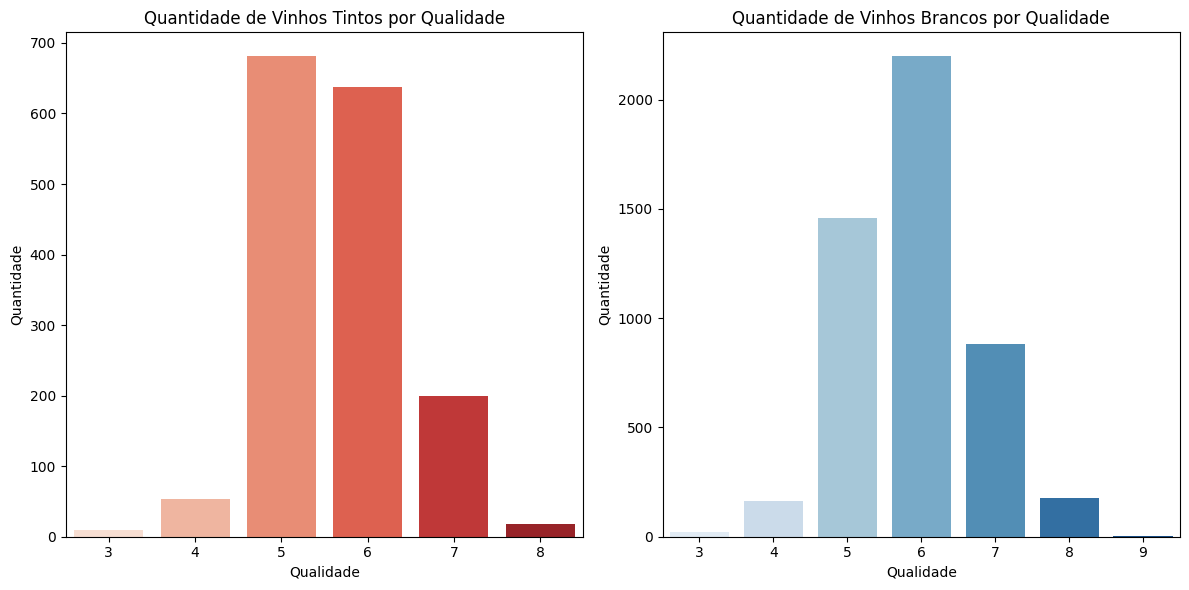

In [ ]:
plt.figure(figsize=(12, 6))

# Countplot para vinhos tintos
plt.subplot(1, 2, 1)
sns.countplot(x='quality', data=wines[wines['color'] == 'red'], palette='Reds')
plt.title('Quantidade de Vinhos Tintos por Qualidade')
plt.xlabel('Qualidade')
plt.ylabel('Quantidade')

# Countplot para vinhos brancos
plt.subplot(1, 2, 2)
sns.countplot(x='quality', data=wines[wines['color'] == 'white'], palette='Blues')
plt.title('Quantidade de Vinhos Brancos por Qualidade')
plt.xlabel('Qualidade')
plt.ylabel('Quantidade')

plt.tight_layout()
plt.show()

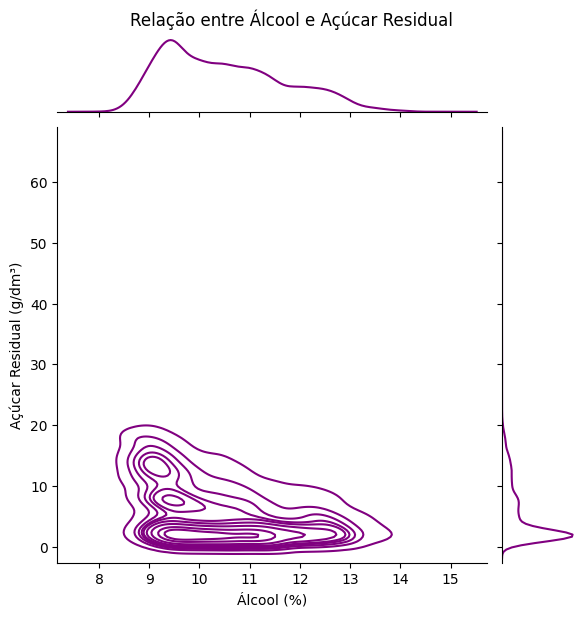

In [ ]:
# Criar um jointplot para álcool e açúcar residual
sns.jointplot(x='alcohol', y='residual sugar', data=wines, kind='kde', color='purple')
plt.suptitle('Relação entre Álcool e Açúcar Residual', y=1.02)  # Ajustar a posição do título
plt.xlabel('Álcool (%)')
plt.ylabel('Açúcar Residual (g/dm³)')
plt.show()

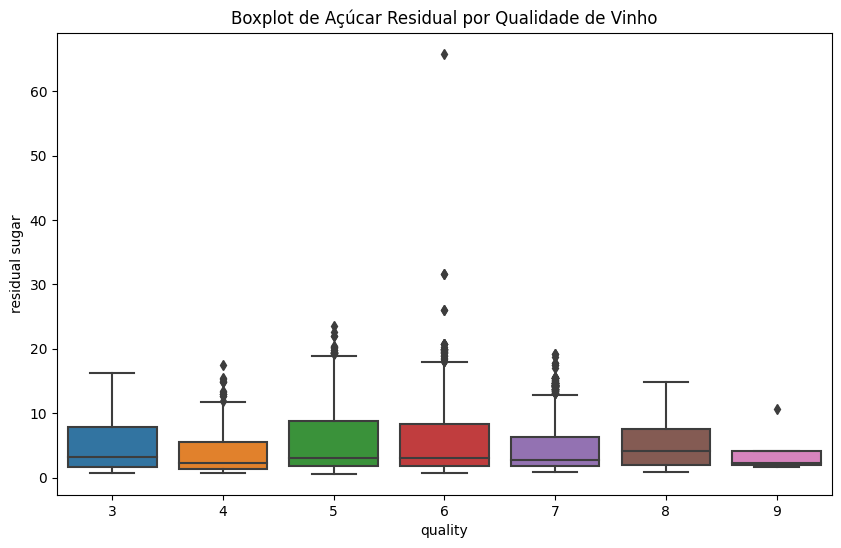

In [ ]:
# Boxplot para verificar outliers em açúcar residual por qualidade
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='residual sugar', data=wines)
plt.title('Boxplot de Açúcar Residual por Qualidade de Vinho')
plt.show()

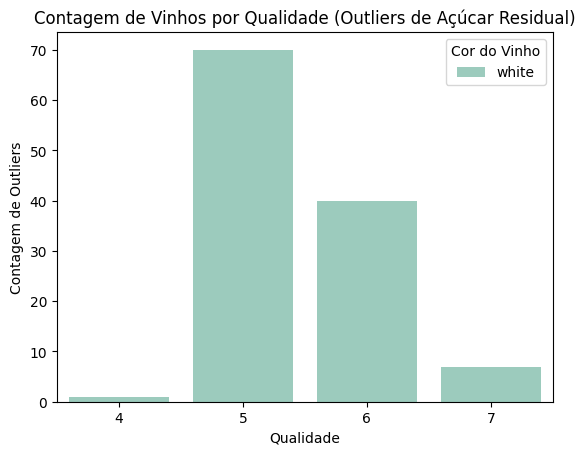

In [ ]:
# Calcular o primeiro e terceiro quartil
Q1 = wines['residual sugar'].quantile(0.25)
Q3 = wines['residual sugar'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites para considerar os outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar os outliers no DataFrame original
outliers_df = wines[(wines['residual sugar'] < lower_bound) | (wines['residual sugar'] > upper_bound)]

# Agora, com os outliers identificados, vamos criar um barplot com a contagem de vinhos por qualidade
# A paleta de cores e a sobreposição serão ajustadas para diferenciar entre vinhos tintos e brancos
sns.countplot(x='quality', data=outliers_df, hue='color', palette='Set2', alpha=0.7)
plt.title('Contagem de Vinhos por Qualidade (Outliers de Açúcar Residual)')
plt.xlabel('Qualidade')
plt.ylabel('Contagem de Outliers')
plt.legend(title='Cor do Vinho')
plt.show()


<ipython-input-18-f508070b894e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = wines.corr()


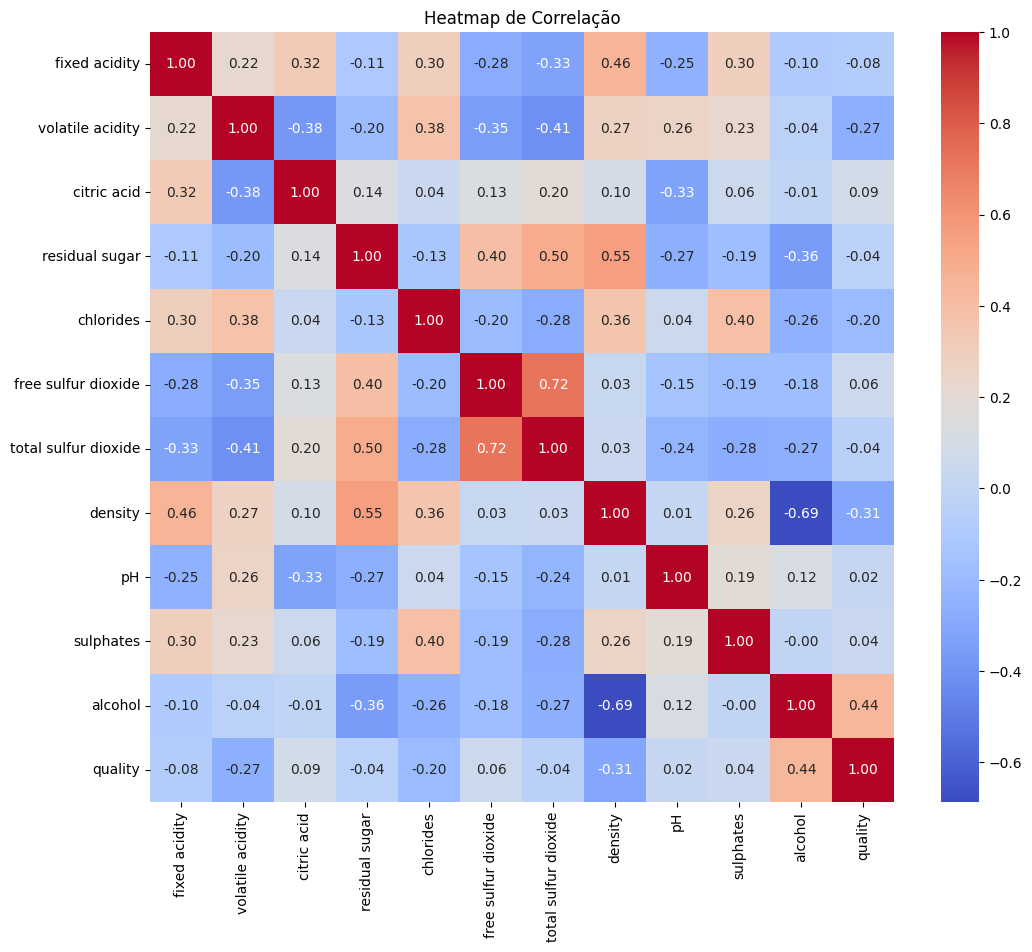

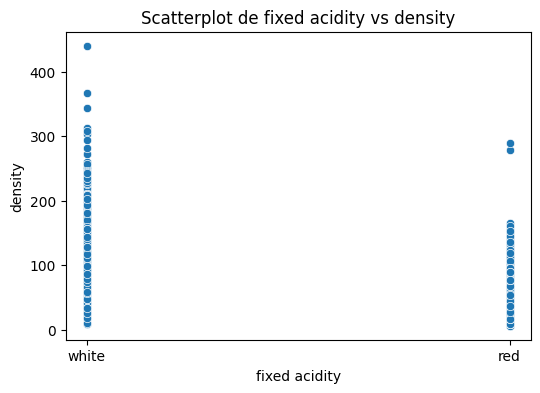

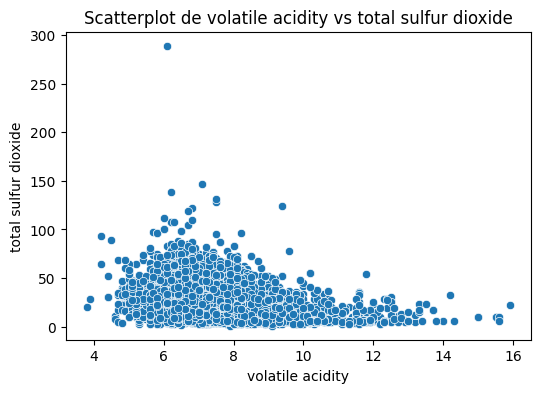

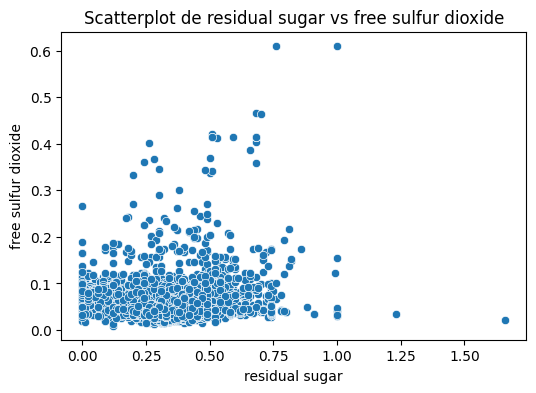

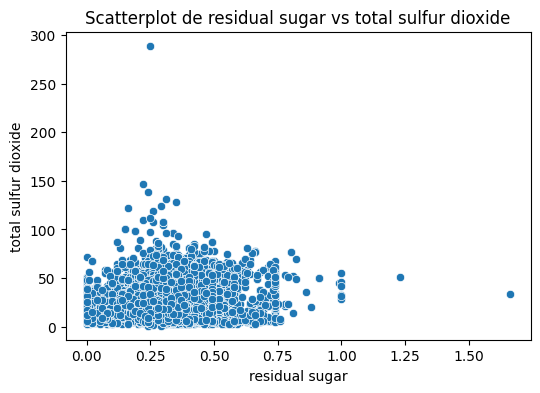

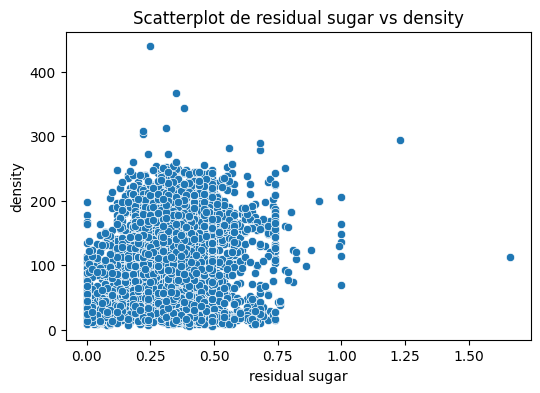

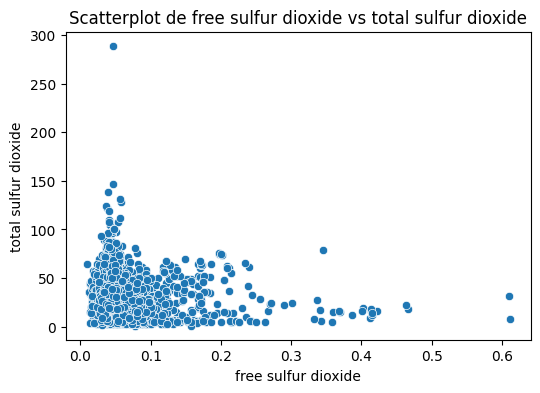

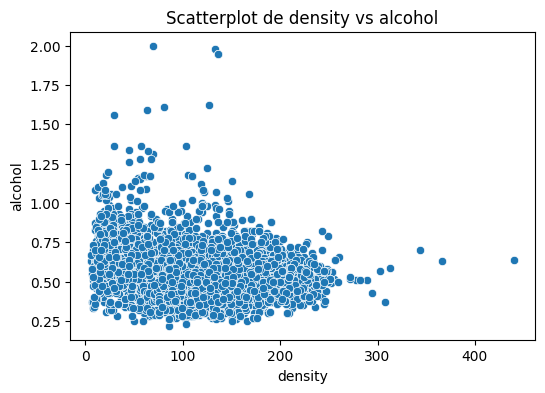

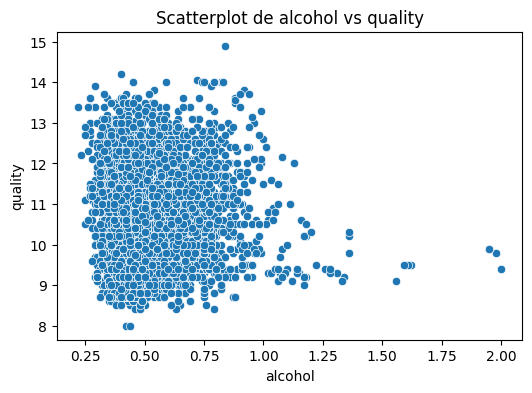

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = wines.corr()

# Criar um heatmap para visualizar as correlações
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap de Correlação')
plt.show()

# Identificar pares de features com correlação forte
# Vamos considerar uma correlação forte como qualquer valor menor que -0.4 ou maior que 0.4
strong_correlations = correlation_matrix[(correlation_matrix < -0.4) | (correlation_matrix > 0.4) & (correlation_matrix != 1.0)]

# Agora podemos criar scatterplots para essas variáveis
for i in range(len(strong_correlations)):
    for j in range(i+1, len(strong_correlations.columns)):
        if not pd.isna(strong_correlations.iloc[i, j]):
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=wines.iloc[:, i], y=wines.iloc[:, j])
            plt.title(f'Scatterplot de {strong_correlations.index[i]} vs {strong_correlations.columns[j]}')
            plt.xlabel(strong_correlations.index[i])
            plt.ylabel(strong_correlations.columns[j])
            plt.show()


Fixed Acidity vs Density: Este gráfico provavelmente mostra uma correlação positiva, indicada por um aumento na densidade à medida que a acidez fixa aumenta. A tendência ascendente sugere que vinhos com maior acidez fixa tendem a ser mais densos.

Volatile Acidity vs Total Sulfur Dioxide: A dispersão indica uma correlação negativa fraca ou ausente. Se houvesse uma correlação negativa, esperaríamos ver uma tendência diagonal descendente, mas essa tendência não é clara aqui.

Residual Sugar vs Free Sulfur Dioxide e vs Total Sulfur Dioxide: Esses gráficos podem mostrar uma correlação positiva fraca, onde um aumento no açúcar residual poderia estar associado a um aumento nos dióxidos de enxofre, mas a dispersão é ampla, indicando muita variação que não é bem explicada por uma linha de tendência clara.

Residual Sugar vs Density: Pode haver uma correlação positiva, indicando que vinhos com mais açúcar residual tendem a ser mais densos. A tendência vetorial aqui seria ascendente, mas novamente, a dispersão é bastante ampla.

Free Sulfur Dioxide vs Total Sulfur Dioxide: Aqui parece haver uma correlação positiva forte, onde um aumento no dióxido de enxofre livre está associado a um aumento no dióxido de enxofre total. O sentido vetorial seria claramente ascendente.

Density vs Alcohol: Este gráfico sugere que há uma correlação negativa, com vinhos mais densos tendendo a ter menor teor de álcool. A tendência vetorial seria diagonal descendente.

Alcohol vs Quality: A dispersão é bastante homogênea e não sugere uma correlação clara. Se houvesse uma correlação positiva, esperaríamos ver que vinhos com maior teor de álcool têm maior qualidade, mas isso não é evidente aqui.

# Modelos Supervisionados

### Classificação
**Utilize o dataset 'wine_classification.csv'.**

Após alguns meses, o filho do Sir. Donald Shelby, Chuck Norris Shelby, mais conhecido como "El Chavo del Ocho", em decorrência de seu "notório" saber e comportamento extrovertido, ~para ser eufemista~, foi promovido a "*head*" de Machine Learning, vulgo seu chefe.

Com suas inusitadas e inovadoras ideias, pediu que você criasse três modelos de árvores, um do tipo "random" e dois do tipo "boost", pois havia descoberto que a otimização pelo gradiente descendente era considerada como "*The American Dream*". Não obstante, gostaria de analisar o gráfico de importância das features.

Ademais, requereu que utilizasse o algoritmo SVM, pelo fato do "kernel trick" performar bem em problemas de altas dimensionalidades. Um KNN "cairia bem também, vamos utilizar por mero desencargo de consciência", disse.  

Em seu discurso inflamado, se pronunciava: "Precisamos realizar tais façanhas nunca vistas na história da Inteligência Artificial, desde que as redes neurais foram introduzidas por Walter Pitts e Warren McCulloch em 1943. Vamos predizer tudo que quisermos, independentemente da uva utilizada na produção. Eu transformarei nossa vinícola na melhor do mundo, pois sou detentor do saber". Tudo dito numa reunião contendo 12 pessoas, trabalhadores braçais inclusos. Tal discurso invejou os oráculos delfos e os lembraram de Sócrates em seu julgamento, antes de morrer.

Após tamanhas proclamações, apontou em sua direção e disse: **"VOCÊ, É..., VOCÊ MESMO**, irás fazer todo o processo por conta própria, e eu direi se o que fazes está correto! Não utilizarás Auto-ML, pois eu, ~professor~, quero ter certeza de que entende seu labor e suas nuâncias".

Você, cansado e entediado de tantas lorotas, se retirou da reunião com "dores" na região abdominal, porém ainda recebeu um e-mail lhe instruindo a comparar os resultados de todas as implementações, escolher o melhor modelo e utilizar métodos de otimização de hiperparâmetro.  

Em suma?

1- Crie um pipeline que contenha ao menos 05 tipos diferentes de algoritmos de classificação.

2- Crie um DataFrame que contenha todos os resultados de todos os algoritmos utilizados, inclusive a métrica ROC AUC.

3- Comparar os resultados, escolher o melhor modelo e otimizar os parâmetros. Ao fim, faça um gráfico da ROC AUC.


In [ ]:
wine_classification_data = pd.read_csv('wine_classification.csv')
wine_classification_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13701 entries, 0 to 13700
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   level_0               13701 non-null  int64  
 1   index                 13701 non-null  int64  
 2   fixed acidity         13701 non-null  float64
 3   volatile acidity      13701 non-null  float64
 4   citric acid           13701 non-null  float64
 5   residual sugar        13701 non-null  float64
 6   chlorides             13701 non-null  float64
 7   free sulfur dioxide   13701 non-null  float64
 8   total sulfur dioxide  13701 non-null  float64
 9   density               13701 non-null  float64
 10  pH                    13701 non-null  float64
 11  sulphates             13701 non-null  float64
 12  alcohol               13701 non-null  float64
 13  quality               13701 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 1.5 MB


In [ ]:
# Separar as variáveis independentes (features) e a variável dependente (target)
X = wine_classification_data.drop(['level_0', 'index', 'quality'], axis=1)
y = wine_classification_data['quality']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir os modelos a serem testados
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}

# DataFrame para armazenar os resultados
results = pd.DataFrame(columns=['Classifier', 'ROC AUC'])

In [ ]:
# Criar um dicionário para armazenar os pipelines
pipelines = {}

# Definir os pipelines para cada classificador
for clf_name, clf in classifiers.items():
    pipelines[clf_name] = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])

# Dicionário para armazenar os resultados de validação cruzada
cv_results = {}

# Realizar validação cruzada e armazenar os resultados
for name, pipeline in pipelines.items():
    # Validação cruzada para ROC AUC
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc_ovr')
    cv_results[name] = cv_scores

# Treinar cada pipeline e calcular o ROC AUC no conjunto de teste
results = {}
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)

    # Prever probabilidades para o conjunto de teste
    y_proba = pipeline.predict_proba(X_test)

    # Calcular ROC AUC usando estratégia one-vs-rest para multiclasse
    roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')

    # Armazenar os resultados
    results[name] = {'ROC AUC': roc_auc}

# Converter os resultados em um DataFrame para exibição
results_df = pd.DataFrame(results).T
results_df

,ROC AUC
Random Forest,0.982593
Gradient Boosting,0.934397
AdaBoost,0.828536
SVM,0.941582
KNN,0.906361


In [ ]:
# Encontrar o melhor modelo
best_model_name = 'Random Forest'  # Como identificado pelos resultados ROC AUC
best_model = classifiers[best_model_name]

# Definir o espaço de hiperparâmetros para o GridSearch
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árvores na floresta
    'max_depth': [None, 10, 20, 30],  # Profundidade máxima da árvore
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras necessárias para dividir um nó interno
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de amostras necessárias para estar em um nó folha
}

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='roc_auc_ovr',  # Usar estratégia one-vs-rest para ROC AUC em multiclasse
                           verbose=2,
                           n_jobs=-1)

In [ ]:
# Realizar a busca em grade (Grid Search)
grid_search.fit(X_train, y_train)

# Resultados da otimização
print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor ROC AUC: {grid_search.best_score_}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Melhores parâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Melhor ROC AUC: 0.976921908880269


ROC AUC do Modelo Otimizado: 0.984265410987314


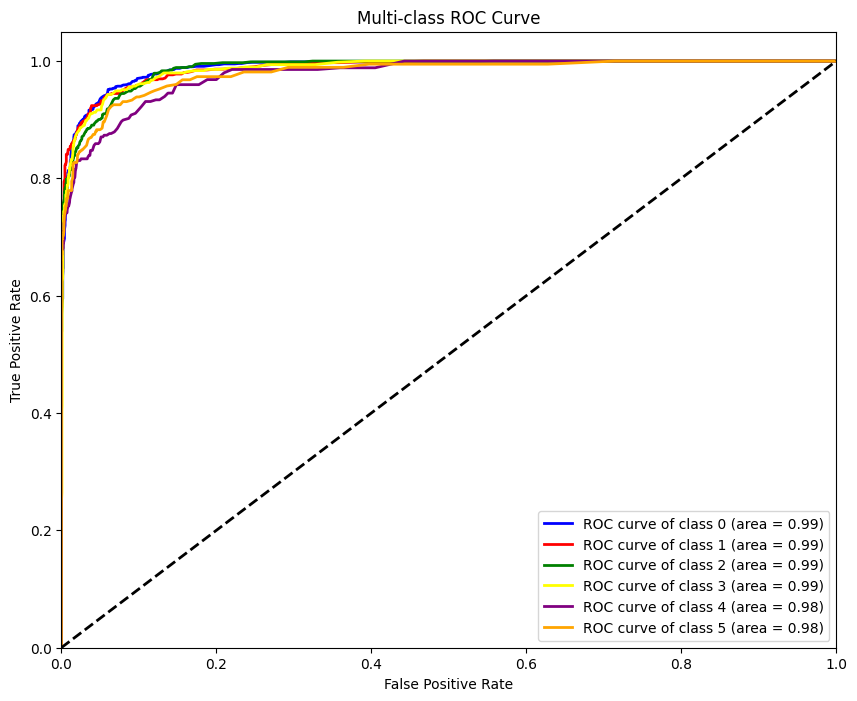

In [ ]:
# Treinar o melhor modelo com os parâmetros otimizados
best_params = grid_search.best_params_
optimized_model = RandomForestClassifier(**best_params, random_state=42)
optimized_model.fit(X_train, y_train)

# Prever probabilidades para o conjunto de teste com o modelo otimizado
y_proba_optimized = optimized_model.predict_proba(X_test)

# Calcular ROC AUC para o modelo otimizado
roc_auc_optimized = roc_auc_score(y_test, y_proba_optimized, multi_class='ovr')
print(f"ROC AUC do Modelo Otimizado: {roc_auc_optimized}")

# Plotar a curva ROC AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarizar as labels para o cálculo da ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_test_bin.shape[1]

# Calcular a curva ROC e a área sob a curva (AUC) para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba_optimized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotar a curva ROC para cada classe
colors = cycle(['blue', 'red', 'green', 'yellow', 'purple', 'orange'])
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()


Após todos seus esforços, o amado chefe lhe pediu para utilizar um algoritmo de classificação que ele ouviu falar, criado pelo matemático inglês Thomas Bayes. Cabe a você, mais uma vez aplicar o algoritmo e apresentar os resultado. Em seguida, faça uma breve explicação do principal problema desse método para solucionar problemas complexos.  

In [ ]:
wine_classification_data = pd.read_csv('wine_classification.csv')

# Separar as variáveis independentes (features) e a variável dependente (target)
X = wine_classification_data.drop(['level_0', 'index', 'quality'], axis=1)
y = wine_classification_data['quality']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar e treinar o modelo Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)

# Previsão no conjunto de teste
y_pred_nb = nb_classifier.predict(X_test_scaled)

# Avaliar o modelo
accuracy_nb = accuracy_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, nb_classifier.predict_proba(X_test_scaled), multi_class='ovr')
report_nb = classification_report(y_test, y_pred_nb)

print(f'Acurácia do Naive Bayes: {accuracy_nb}')
print(f'ROC AUC do Naive Bayes: {roc_auc_nb}')
print('Relatório de classificação:\n', report_nb)

Acurácia do Naive Bayes: 0.5249331063001703
ROC AUC do Naive Bayes: 0.8081700490072515
Relatório de classificação:
               precision    recall  f1-score   support

         3.0       0.66      0.63      0.64      1448
         4.0       0.55      0.56      0.56       724
         5.0       0.45      0.43      0.44       723
         6.0       0.45      0.59      0.51       492
         7.0       0.30      0.39      0.34       348
         8.0       0.50      0.27      0.35       376

    accuracy                           0.52      4111
   macro avg       0.49      0.48      0.47      4111
weighted avg       0.53      0.52      0.52      4111



O Naive Bayes assume que todas as características de um conjunto de dados são independentes entre si, o que raramente acontece na realidade. Esta suposição simplificadora pode fazer com que o modelo não capte relações importantes entre as características, o que pode reduzir sua eficácia em problemas complexos onde essas relações são cruciais para fazer previsões precisas. No entanto, apesar dessa simplificação, o Naive Bayes muitas vezes funciona melhor do que o esperado, especialmente em situações com muitos atributos e classes bem definidas.

Dr. Anton Ego marcou uma data para comparecer na vinícula e degustar seus melhores rótulos. Nascido na França e o enólogo mais famoso do mundo, Anton era temido pelas suas análises minuciosas e certeiras. As críticas eram tão serveras que tão severas que 80% das vinículas eram fechadas pela falta de aceitação do mercado. Apenas =~ 19.99% sobreviviam sem danos consideráveis e somente $0.1x10^{-15}$% se tornavam uma lenda.

Chuck tomava leite da papoula para suportar tamanha disruptura emocional. Sir.Donald, tomado pela a ansiedade, estava com seus pruridos mentais em Nárnia até que sua esposa, Srta.Audrey Hepburn assumiu a liderança do projeto com a serenidade de um bebê.

Primeiramente ordenou que todos os vinhos que já vinham há algum tempo em processo de envelhecimento em barricas de carvalho fossem engarrafados e que amostras de todos fossem coletadas para análise.

Sua maior preocupação é que somente sejam servidos os vinhos de nota oito ou nove, pois ambos são de mesmíssima qualidade, ficando a avaliação a critério da subjetividade palatal do degustador. Em **<u>hipótese nenhuma</u>** um vinho que não tenha tais notas pode ser servido.

De todas as novas garrafas, serão servidas somente três que você autorizar. O Dr. Ego só toma vinho tinto!


Sabendo que você já tinha um modelo validado para solucionar este tipo de problema, pediu que o usasse na base **'desafio.csv''**. Ao fim, crie uma célula e copie os 3 vinhos que escolheu para registrar sua resposta.


In [ ]:
desafio = pd.read_csv('desafio.csv').drop(columns=['Unnamed: 0', 'index'])
desafio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13890 entries, 0 to 13889
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         13890 non-null  float64
 1   volatile acidity      13890 non-null  float64
 2   citric acid           13890 non-null  float64
 3   residual sugar        13890 non-null  float64
 4   chlorides             13890 non-null  float64
 5   free sulfur dioxide   13890 non-null  float64
 6   total sulfur dioxide  13890 non-null  float64
 7   density               13890 non-null  float64
 8   pH                    13890 non-null  float64
 9   sulphates             13890 non-null  float64
 10  alcohol               13890 non-null  float64
 11  quality               13890 non-null  float64
dtypes: float64(12)
memory usage: 1.3 MB


0        0.480959
1        0.165759
2        0.381716
3        0.233230
4        0.280058
           ...   
13885    0.605907
13886    0.362750
13887    0.171294
13888    0.434178
13889    0.573428
Name: chlorides, Length: 13890, dtype: float64

In [ ]:
desafio = desafio[desafio['quality'] >= 8.0]

desafio = desafio.drop(['quality'], axis=1)

desafio['new_quality'] = optimized_model.predict(desafio)

In [ ]:
vinhos_finais = desafio.sort_values(by='new_quality', ascending=False).iloc[:3, :]
print(vinhos_finais)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
13880       7.599682          1.245215     0.445295       24.707825   
13881      10.570403          1.226605     0.726490       15.564530   
13879       9.627148          1.196482     0.185288       45.688450   

       chlorides  free sulfur dioxide  total sulfur dioxide   density  \
13880   0.500266            257.54187             297.75410  1.005547   
13881   0.482676            144.58850             323.34747  0.997816   
13879   0.482992            183.42427             242.55230  1.004135   

             pH  sulphates    alcohol  new_quality  
13880  3.748607   0.695790  11.744192          8.0  
13881  3.429364   1.043188  10.984821          8.0  
13879  3.499092   0.245248  10.747989          6.0  


### Modelos não Supervisionados

**Utilize o dataset 'wines.csv' e 'wines_splines.csv'**

Chuck Norris tem um amigo famoso no mundo da ciência de dados, seu nome é Rocky Balboa. Em uma conversa sobre alguns métodos que podem ser utilizados para criar novos vetores (_features engineering_), o Sr.Rocky propôs que fossem utilizados Splines. Completamente emocionado com a ideia, Chuck decidiu aplicar esta técnica utilizando até a oitava potência.

Ele pediu a você que fizesse um estudo comparativo utilizando o PCA. O intuito é analisar se a redução de dimensionalidade pode ser vantajosa para o dataset original e o dataset com Splines.

1- Compare a variância explicada de cada um dos datasets

2- Explique porque o PCA seria, ou não uma boa abordagem para o dataset com Splines. Ademais, discorra sobre a influência de ruídos.

3- Utilize um loop "for" e crie uma condição para que, quando a variância for maior do que 0.92, seja retornado o número de features totais, faça para ambos datasets.

In [ ]:
wines_data = pd.read_csv('wines.csv')
wines_splines_data = pd.read_csv('wines_splines.csv')
wines_data.info()
wines_splines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries,

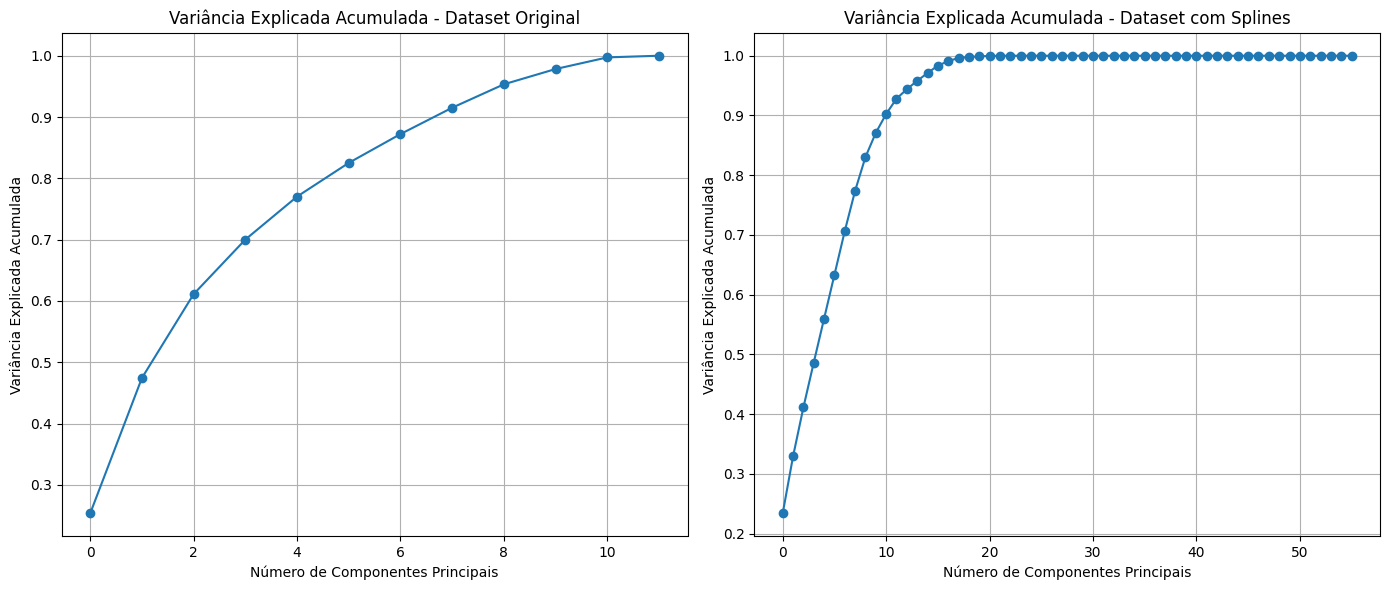

In [ ]:

# Função para carregar e preparar os dados para o PCA
def prepare_data_for_pca(df):
    # Removendo colunas não numéricas
    df_numeric = df.select_dtypes(include=[np.number])

    # Normalizando os dados
    scaler = StandardScaler()
    df_normalized = scaler.fit_transform(df_numeric)

    return df_normalized

# Carregando os dados (os datasets devem ser carregados aqui)
# Como exemplo, vou usar dados fictícios, mas você deve substituir isso pelos seus dados reais

# Preparando os dados para o PCA
wines_prepared = prepare_data_for_pca(wines_data)
wines_splines_prepared = prepare_data_for_pca(wines_splines_data)

# Aplicando PCA
pca_wines = PCA(n_components=wines_prepared.shape[1])
pca_wines_splines = PCA(n_components=wines_splines_prepared.shape[1])

pca_wines.fit(wines_prepared)
pca_wines_splines.fit(wines_splines_prepared)

# Variância explicada acumulada
variance_explained_wines = np.cumsum(pca_wines.explained_variance_ratio_)
variance_explained_wines_splines = np.cumsum(pca_wines_splines.explained_variance_ratio_)

plt.figure(figsize=(14, 6))

# Gráfico para o dataset original (wines.csv)
plt.subplot(1, 2, 1)
plt.plot(variance_explained_wines, marker='o')
plt.title('Variância Explicada Acumulada - Dataset Original')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.grid(True)

# Gráfico para o dataset com Splines (wines_splines.csv)
plt.subplot(1, 2, 2)
plt.plot(variance_explained_wines_splines, marker='o')
plt.title('Variância Explicada Acumulada - Dataset com Splines')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.grid(True)

plt.tight_layout()
plt.show()


O PCA pode ser útil para datasets com Splines ao reduzir a complexidade resultante da alta dimensionalidade, potencialmente capturando relações não lineares. No entanto, há riscos de realçar ruídos introduzidos pelas muitas novas características geradas pelas Splines. A eficácia do PCA depende da relevância e da qualidade das características adicionadas, sendo crucial uma pré-análise cuidadosa para garantir a utilidade desses novos dados.

In [ ]:
# Inicializando as variáveis para armazenar o número de componentes necessários
num_features_wines = 0
num_features_wines_splines = 0

# Encontrando o número de componentes necessários para variância > 0.92 para o dataset original
for i, variance in enumerate(variance_explained_wines):
    if variance > 0.92:
        num_features_wines = i + 1  # Adiciona 1 porque o índice começa em 0
        break

# Encontrando o número de componentes necessários para variância > 0.92 para o dataset com Splines
for i, variance in enumerate(variance_explained_wines_splines):
    if variance > 0.92:
        num_features_wines_splines = i + 1  # Adiciona 1 porque o índice começa em 0
        break

print(f"número de features para a base wines: {num_features_wines}")
print(f"número de features para a base wines_splines: {num_features_wines_splines}")


número de features para a base wines: 9
número de features para a base wines_splines: 12


**Utilize o dataset 'wines.csv'**

Uma ideia realmente interessante é a clusterização. Por vezes, podemos nos espantar com certos resultados. Aqui, você deve utilizar o dataset original e separar cada nota em um cluster.

1- Validar os resultados do algoritmo Kmeans com o dataset original

2- Aplicar o método do Cotovelo e averiguar se o número de clusters apontados são iguais ao número de cluster que você tem de usar.

3- Utilizar o método da Silhueta e averiguar se o número de clusters apontados são iguais ao número de cluster que você tem de usar.

4- Explique os principais conceitos dos métodos das questões 2 e 3.

In [ ]:
wine_data = pd.read_csv('wines.csv')

wine_data_dummies = pd.get_dummies(wine_data)

# Normalizar os dados
scaler = StandardScaler()
scaled_features = scaler.fit_transform(wine_data_dummies)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

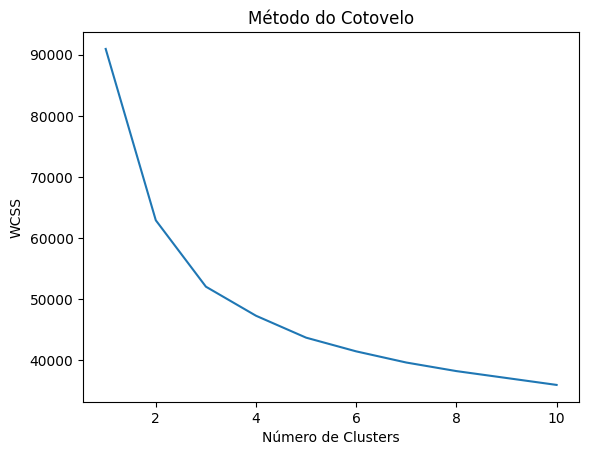

In [ ]:
# Método do Cotovelo para encontrar o número ótimo de clusters
wcss = []  # Soma dos quadrados intra-cluster
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# # Método da Silhueta para avaliar a qualidade dos clusters
# for i in range(2, 11):
#     kmeans = KMeans(n_clusters=i, random_state=42)
#     cluster_labels = kmeans.fit_predict(scaled_features)
#     silhouette_avg = silhouette_score(scaled_features, cluster_labels)
#     print(f"Para n_clusters = {i}, o score médio da silhueta é: {silhouette_avg}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 2, a silhueta média é: 0.364300949995843


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 3, a silhueta média é: 0.24988821306364822


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 4, a silhueta média é: 0.24142185439471403


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 5, a silhueta média é: 0.1914534444693933


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 6, a silhueta média é: 0.1934393122929268


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 7, a silhueta média é: 0.18248940107936645


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 8, a silhueta média é: 0.16091052822835936


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 9, a silhueta média é: 0.13641000987742113


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 10, a silhueta média é: 0.1385659633290617


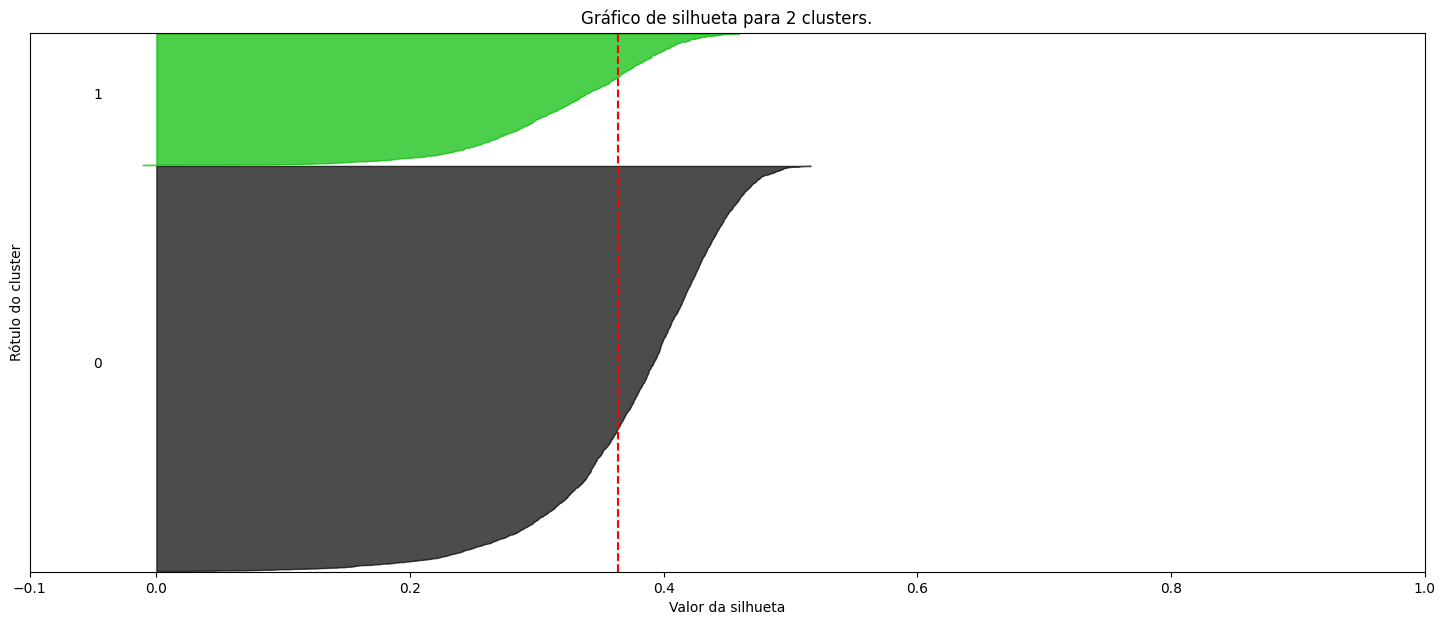

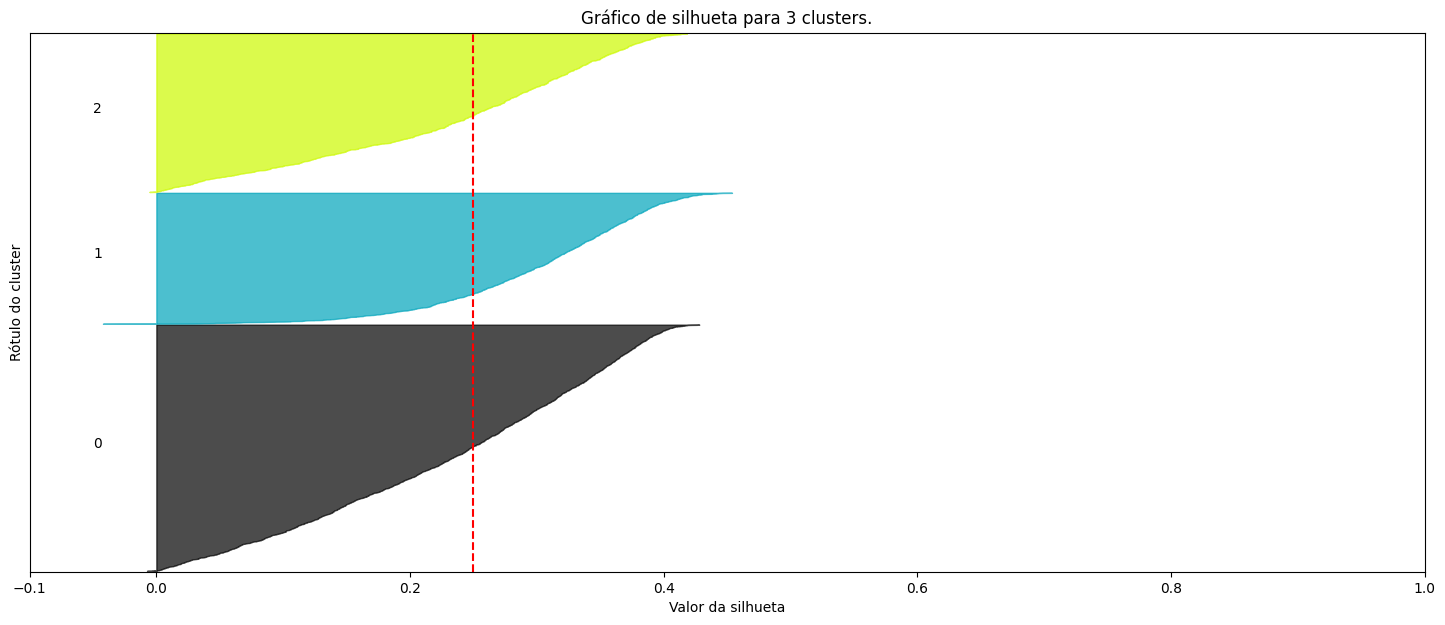

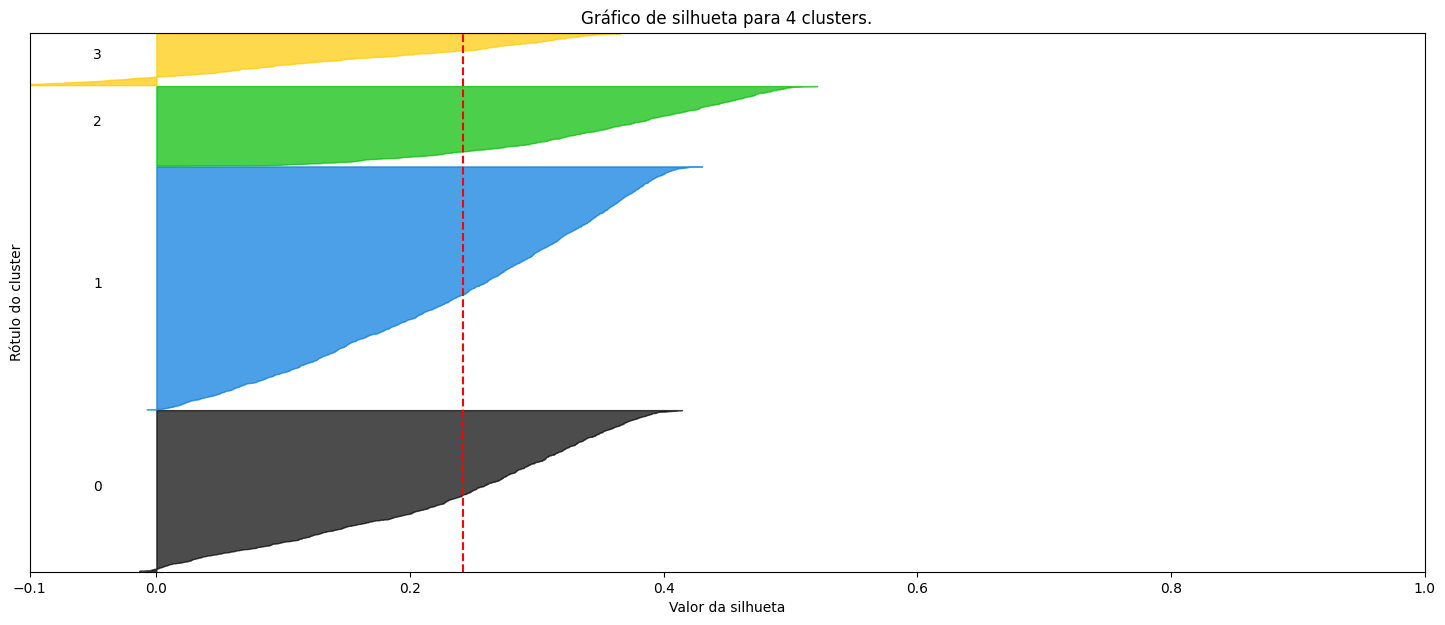

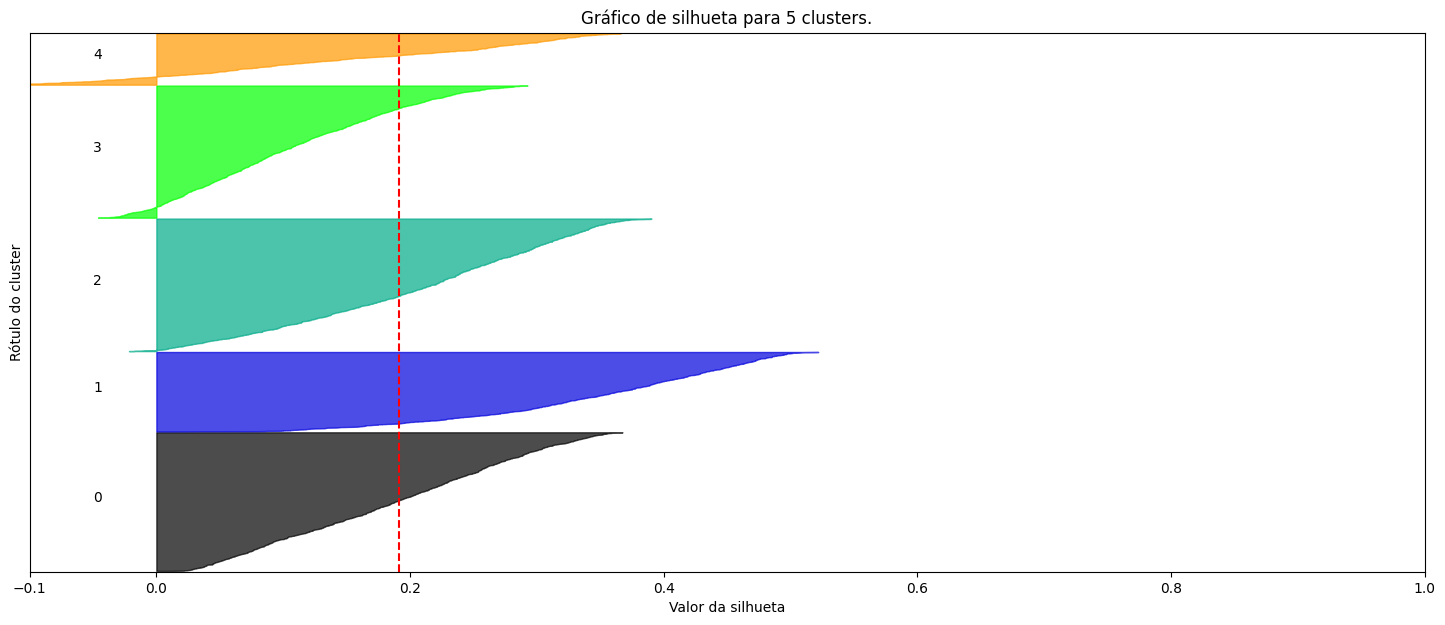

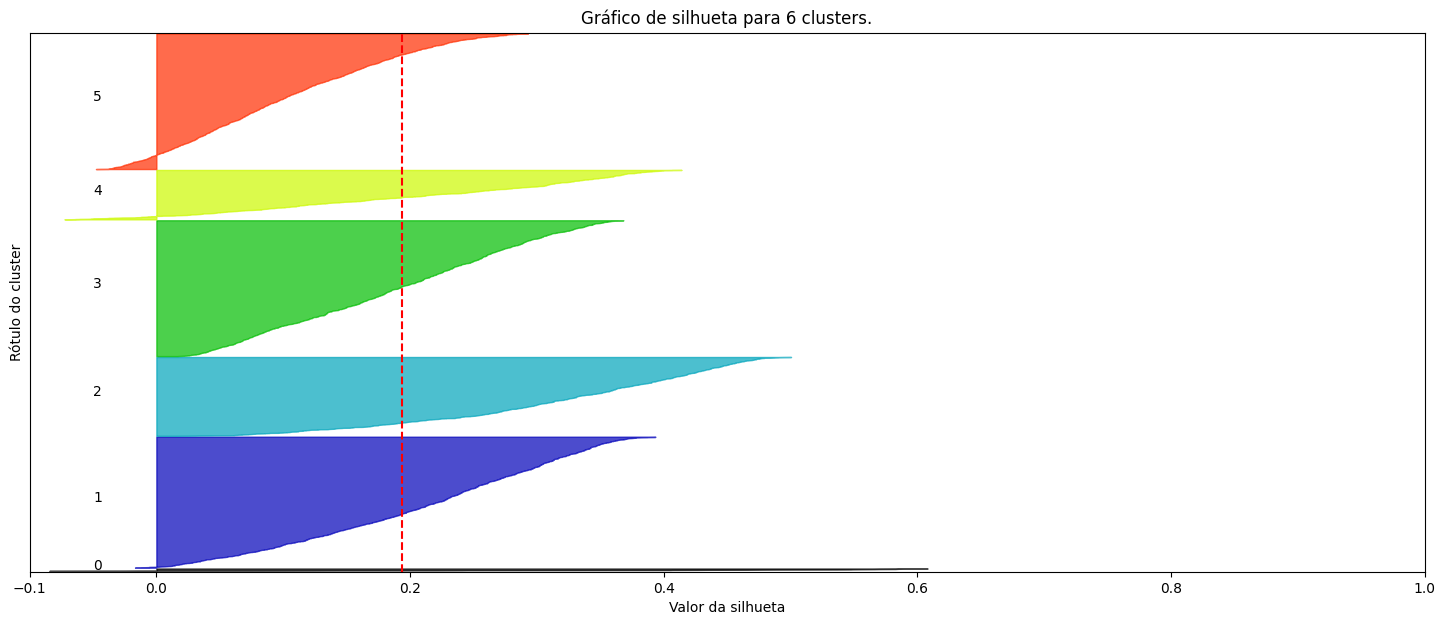

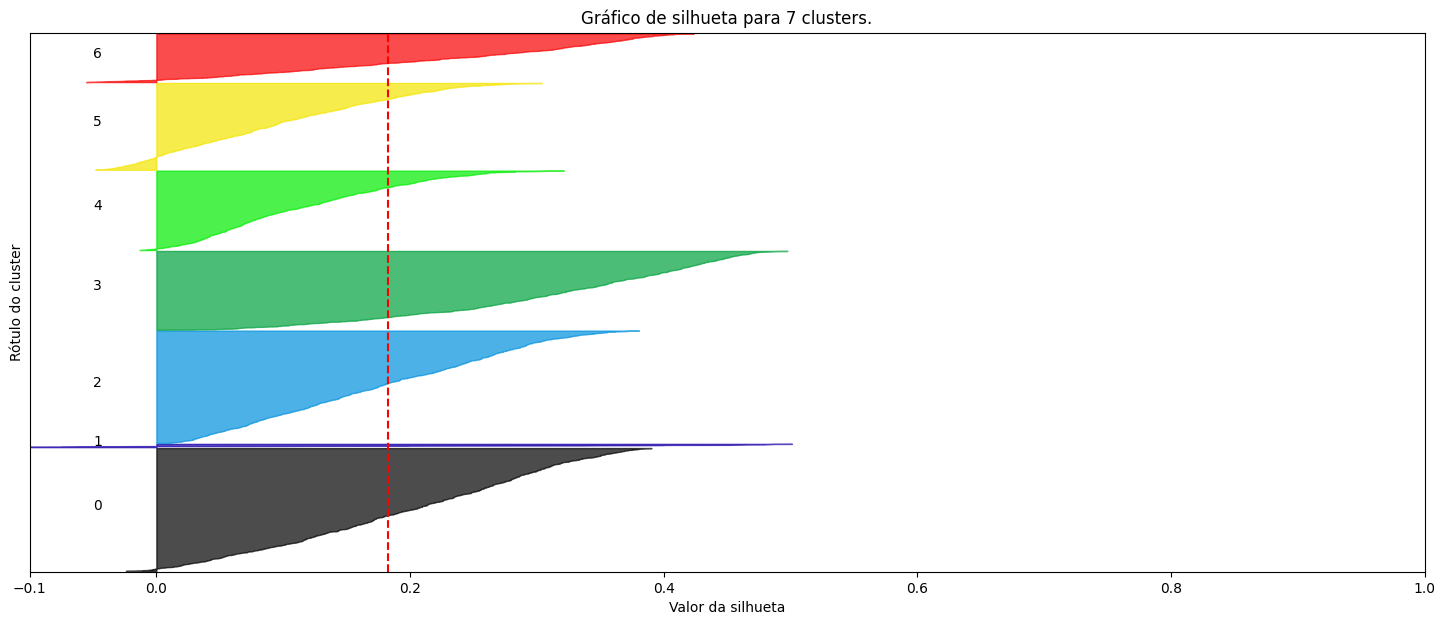

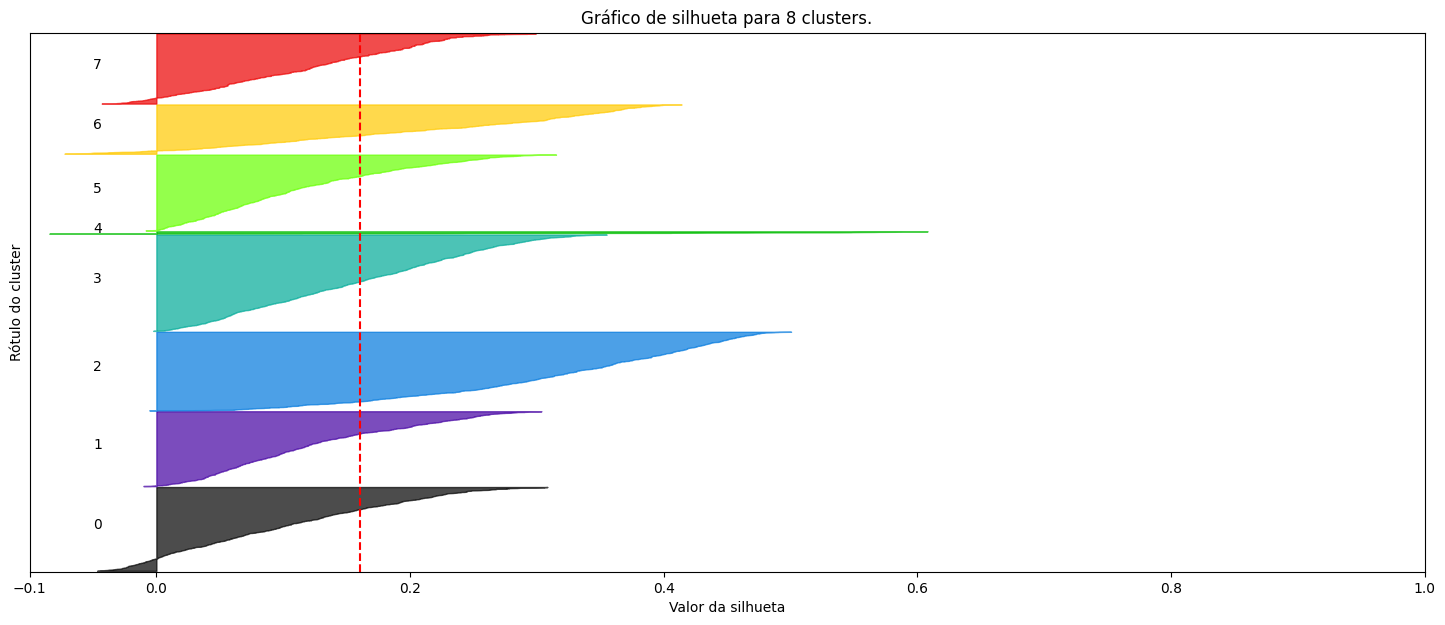

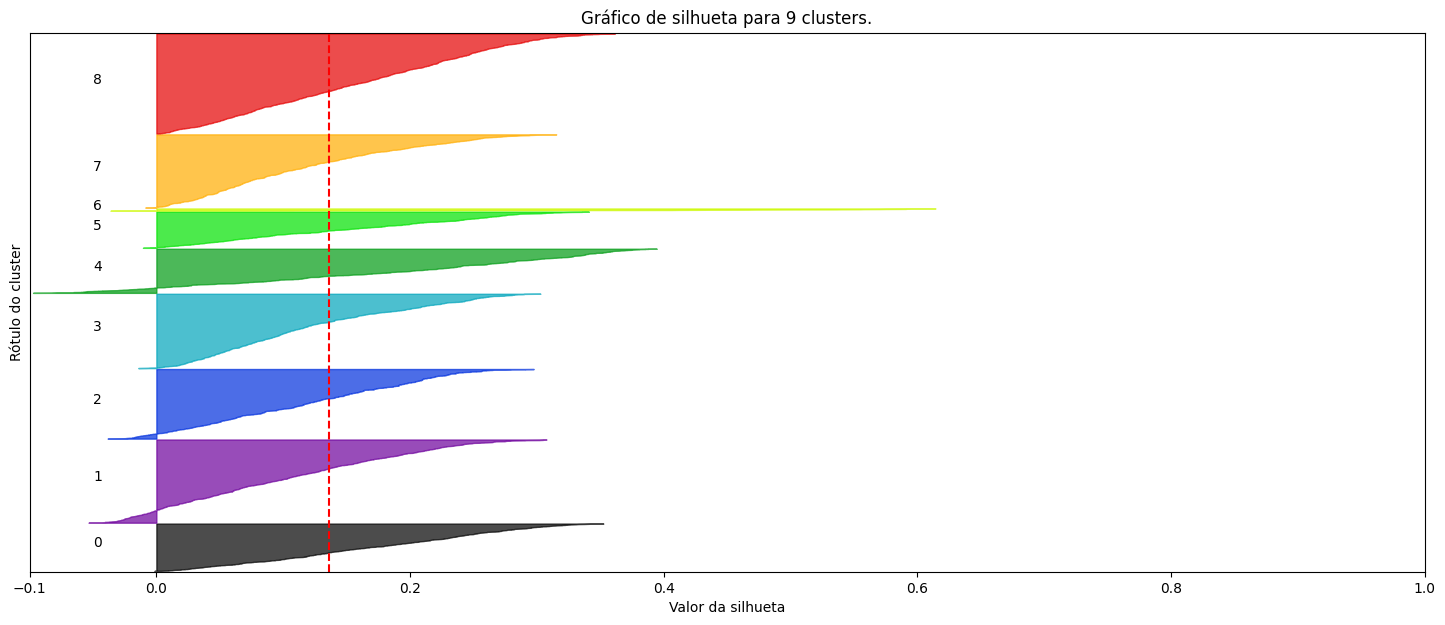

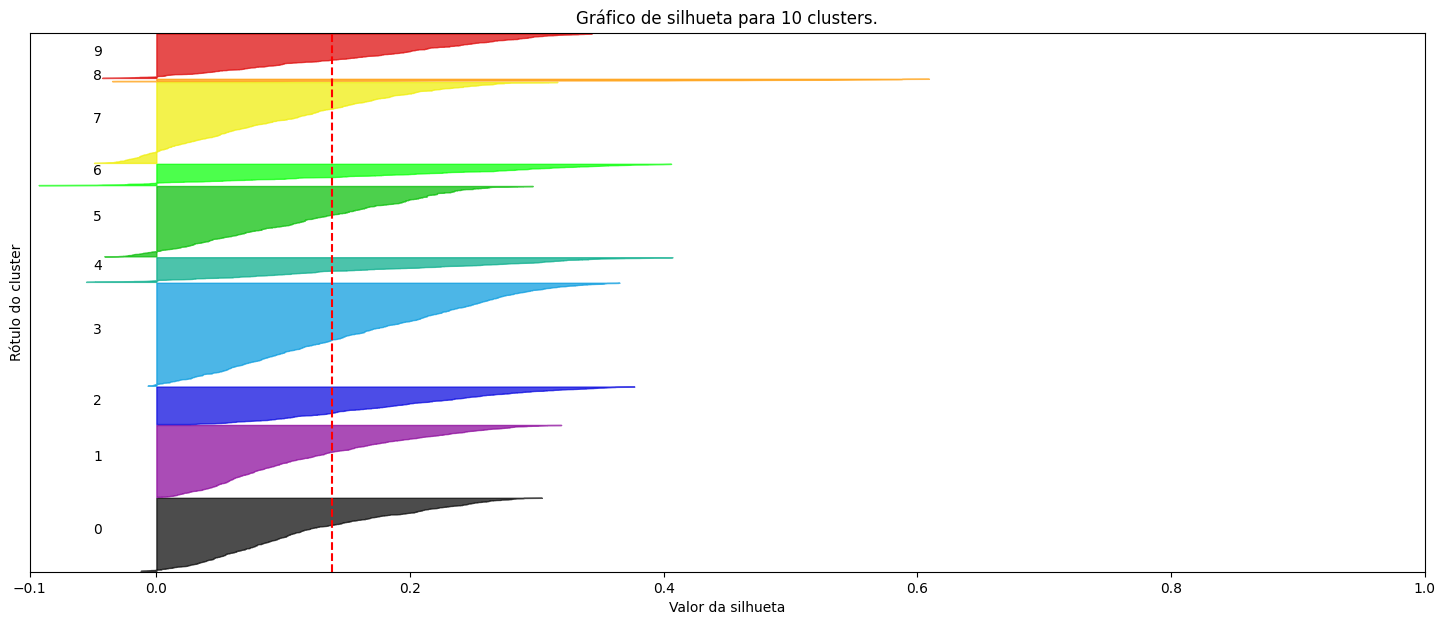

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Criar um subplot com 1 linha e 1 coluna
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Intervalo para o coeficiente de silhueta (entre -0.1, 1)
    ax1.set_xlim([-0.1, 1])
    # Inserir um espaço em branco entre os gráficos de silhueta para destacá-los
    ax1.set_ylim([0, len(scaled_features) + (n_clusters + 1) * 10])

    # Inicializar o clusterer com o número de clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(scaled_features)

    # O score médio da silhueta para todos os samples
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    print(f"Para n_clusters = {n_clusters}, a silhueta média é: {silhouette_avg}")

    # Calcular as pontuações da silhueta para cada amostra
    sample_silhouette_values = silhouette_samples(scaled_features, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Agregar e classificar as pontuações da silhueta para cada cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Rotular os gráficos de silhueta com o número do cluster no meio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 para as amostras em branco

    ax1.set_title(f"Gráfico de silhueta para {n_clusters} clusters.")
    ax1.set_xlabel("Valor da silhueta")
    ax1.set_ylabel("Rótulo do cluster")

    # A linha vertical para o score médio da silhueta de todos os valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Limpar os yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

**Método do Cotovelo**

Objetivo: Determinar o número ótimo de clusters em uma análise de clusterização.
Funcionamento: Calcula a soma dos quadrados dentro dos clusters (WCSS) para diferentes números de clusters (k) e busca o ponto onde o aumento de k resulta em um decréscimo marginal do WCSS, formando um "cotovelo" no gráfico.
Interpretação: O "cotovelo" no gráfico indica o número adequado de clusters, equilibrando a compactação dos clusters e a quantidade de clusters.

**Método da Silhueta**

Objetivo: Avaliar a qualidade da separação dos clusters.
Funcionamento: Calcula o coeficiente de silhueta para cada ponto, que mede o quão bem um ponto foi agrupado, considerando a distância média para os pontos no mesmo cluster e para o cluster mais próximo.
Interpretação: Coeficientes próximos de +1 indicam uma boa separação dos clusters, enquanto valores próximos de 0 ou negativos sugerem sobreposição ou agrupamentos inadequados.
Ambos os métodos são usados para encontrar um equilíbrio ideal no número de clusters em análises de clusterização, como no algoritmo K-means.

**Utilize o dataset 'logs_firewall.xlsx'**

A Università di Bologna tem cursos de graduação e pós graduação em enologia. Os grandes enólogos do mundo são os únicos que podem fazer o doutorado nesta renomada universidade. Esta instituição tem um contrato milionário com o Sr.Donald, onde todos os alunos poderiam comparecer uma semana a cada três meses para estudar as características, mecânicas de plantações, tecnologias, processos de confecção dos vinhos, entre outras matérias. Todos os professores, escanções extremamente bem conceituados, sempre estão presentes.

Caso infortúnio, O Sr.Hafþór Júlíus Björnsson, mais conhecido como "o Montanha", chefe de segurança cibernética da empresa apertou o botão DEFCON-1 ao perceber que os servidores tinham sido 'hackeados'. Momento em que notou que os bancos de dados que continham as notas dos vinhos haviam sido alterados/deletados e o backup infectado por um Ransomware chamado "HUE HUE HUE BR". Aparentemente, os black-hats conseguiram alterar de 5% a 25% dos dados referentes aos vinhos tintos, antes que o Montanha conseguisse exterminar as conexões dos servidores.

O Sr.Donald Shelby aproximou-se para falar com você sobre as políticas da empresa, criadas por sua esposa, que dispunham sobre o bem estar, ambiente não tóxico, agregação dos "colaboradores" ~pseudo escravos~ como familiares, dentre outros ideais da mesma seara. Em seguida incorporou o espírito de Don Corleone e proferiu uma de suas máximas ao falar "Política é saber a hora de puxar o gatilho".   

Uma regra clara da empresa dispõe sobre a impossibilidade de extrair datasets como arquivos e, toda vez que for utilizar os dados no Jupyter Notebook, deve ser realizado uma query no datalake. Ocorre que, 'sem querer querendo', você estava "desatento" e salvou os dados para estudos quando estivesse em casa. Nítido que se disse-se que havia copiado quaisquer dados seria torturado, por isso não poderia simplesmente colocá-los de volta no banco e, como não queria morrer, tinha de encontrar vias oblíquas para dirimir a questão.

Erick Cartman, analista de infraestrutura, recebeu ordens para recuperar os dados a qualquer custo e, caso falhasse, seria devidamente penalizado ~executado~. Desolado, regado a fanta uva, com palavras arrastadas e chiadas, Erick lhe pediu ajuda. Com muita pena, pegou seu disquete que continha a cópia dos dados e o entregou, pedindo extrema confidencialidade.

Para sua surpresa, após ter a vida salva, receber aumentos salariais e bonificações, Erick te chantageou. "Agora pediram para eu analisar os logs do firewall que contém informações de acesso a servidores e descobrir os possíveis culpados. Eu não sei fazer isso não, 'ocê tá LOUKO'. Dá teus pulos aí se não eu te conto que você copia dados da empresa!!!"

Conhecedor de diversas técnicas para detecção de outliers, se lembrou de uma que já tinha experiência: Isolation Forest.

1- Descubra o nome do responsável pelo o ataque.

**ps**: Recentemente houve um estudo estatístico que comprovou que existe um fator de risco em relação aos horários de acesso, são eles:  

Entre 09:00 às 12:00 o risco varia entre 0-10%

Entre 12:00 às 14:00 o risco varia entre 5-10%

Entre 14:00 às 19:00 o risco varia entre 0-10%

Entre 19:00 às 21:00 o risco varia entre 20-30%

Entre 21:00 às 23:00 o risco varia entre 40-50%

Entre 00:00 às 02:00 o risco varia entre 60-80%

Entre 02:00 às 06:00 o risco varia entre 80-100%

Entre 06:00 às 09:00 o risco varia entre 30-40%

**<u>Esse fator pode ser recriado usando o método 'random.uniform', com 'seed' = 64.</u>**

In [ ]:
logs = pd.read_excel('logs_firewall.xlsx')
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   H        1102 non-null   int64 
 1   M        1102 non-null   int64 
 2   S        1102 non-null   int64 
 3   Nome     1102 non-null   object
 4   Maquina  1102 non-null   object
 5   IP       1102 non-null   object
dtypes: int64(3), object(3)
memory usage: 51.8+ KB


In [ ]:
logs = pd.read_excel('logs_firewall.xlsx')

# Simulate the data
np.random.seed(64)

# Função para calcular o fator de risco com base no horário
def calculate_risk_factor(row):
    time_of_access = time(row['H'], row['M'], row['S'])
    if time(9, 0) <= time_of_access < time(12, 0):
        return np.random.uniform(0, 10)
    elif time(12, 0) <= time_of_access < time(14, 0):
        return np.random.uniform(5, 10)
    elif time(14, 0) <= time_of_access < time(19, 0):
        return np.random.uniform(0, 10)
    elif time(19, 0) <= time_of_access < time(21, 0):
        return np.random.uniform(20, 30)
    elif time(21, 0) <= time_of_access < time(23, 0):
        return np.random.uniform(40, 50)
    elif time(0, 0) <= time_of_access < time(2, 0):
        return np.random.uniform(60, 80)
    elif time(2, 0) <= time_of_access < time(6, 0):
        return np.random.uniform(80, 100)
    elif time(6, 0) <= time_of_access < time(9, 0):
        return np.random.uniform(30, 40)
    else:
        # Caso não se encaixe em nenhuma das categorias acima
        return 0
# Add a risk column based on time
logs['Risk'] = logs.apply(calculate_risk_factor, axis=1)

# Adjusting the Isolation Forest to include anomaly scores
iso_forest = IsolationForest(contamination=0.00001)
iso_forest.fit(logs[['H', 'M', 'S', 'Risk']])

# Calculate the anomaly scores (the lower, the more abnormal)
logs['Anomaly_Score'] = iso_forest.decision_function(logs[['H', 'M', 'S', 'Risk']])

# Convert the anomaly score to a probability of being an anomaly
# Since the score ranges from -1 (most anomalous) to 1 (least anomalous), we transform it to a probability
logs['Anomaly_Probability'] = 1 - (logs['Anomaly_Score'] - logs['Anomaly_Score'].min()) / (logs['Anomaly_Score'].max() - logs['Anomaly_Score'].min())

logs['Anomaly_Probability'] = logs['Anomaly_Probability'] * 100

logs = logs.sort_values(by='Anomaly_Probability', ascending=False).reset_index(drop=True)
# Display the logs with Anomaly Probability in percentage

print(f"\nO usuário com mais probabilidade de ser o responsável pelo ataque é o {logs.loc[0, 'Nome']}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



O usuário com mais probabilidade de ser o responsável pelo ataque é o hanskelsen@empresax.COM.BR
